In [1]:
import numpy as np
from mixture import gaussian_mixture
import random
from CG_solver import CG_solver
from update_progress import update_progress

In [2]:
def matrix_neighboor(X, dist):
    n = len(X)
    C = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if i != j:
                C[i][j] = np.linalg.norm(X[i] - X[j])
                C[j][i] = np.linalg.norm(X[i] - X[j])
    res = np.zeros((n,n))
    for i in range(n):
        mini = np.inf
        j_mini = 0
        for j in range(n):
            if i!=j and C[i][j] < mini:
                mini = C[i][j]
                j_mini = j
        for j in range(n):
            if C[i][j] < dist*mini and i!=j:
                res[i][j] = C[i][j]
        #sorted_i = sorted(range(len(C[i])), key=lambda k:  C[i][k])
        #for k in range(K):
        #    if sorted_i[k] != i:
        #        res[i][sorted_i[k]] = C[i][sorted_i[k]]
    return res

In [6]:
m = 3
n = 40

d = 2

#C_1 = matrix_neighboor(X_1, 320)
#C_2 = matrix_neighboor(X_2, 320)

a = 5
L = 10

Dist_g = np.linspace(3, 20, 5)
B = np.linspace(0.2, 0.8, L)
dist = []
C_bar = np.eye(m)
alpha_0 = [0.8, 0.19, 0.01]
alpha_1 = [0.5, 0.3, 0.2]
alpha_2 = [0.1, 0.2, 0.7]
Alpha = [alpha_0, alpha_1, alpha_2]
RES = []
u = 0
for alpha in Alpha:
    mu = [[-10, 10], [1, 2], [10, 3]]#, [40, 50]]
    sigma = [np.array([[3, 1], [1, 10]]), np.array([[1, 1], [0, 2]]), np.array([[3, 0], [0, 1]])]#, np.array([[1, 0], [0, 1]])]
    X = gaussian_mixture(n, d, alpha, mu, sigma)
    l_alpha = []
    for l in Dist_g:
        C = matrix_neighboor(X, l)
        b_alpha = []
        for b in B:
            update_progress(u/150)
            h = [0 for i in range(n)]
            for i in range(n):
                res = 0
                for j in range(n):
                    if C[i][j] != 0:
                        res += 1
                h[i] = np.power(res + a, b)
            h = np.array(h)
            h = 1/np.sum(h)*h
            #h = np.array([np.power(np.sum(C[i]) + a, b) for i in range(n)])
            #h = 1/np.sum(h)*h
            D = np.zeros((n,m))
            T = np.zeros((n,m))
            for i in range(n):
                T[i][0] = h[i]*0.7
                T[i][1] = h[i]*0.3

            solver = CG_solver(T, C, C_bar, h, D)
            T = solver.run(10e-3)
            one = np.array([1 for i in range(n)])
            one_3 = np.array([1 for i in range(m)])
            b_alpha.append([b, T.T@one])
            u += 1
        l_alpha.append([l, b_alpha])
    RES.append(l_alpha)
            
        


Percent: [##########] 99.33% 

In [9]:
def min_dist(x_1, x_2):
    res = 0
    y_1 = np.sort(x_1)
    y_2 = np.sort(x_2)
    return np.linalg.norm(y_1 - y_2)
    

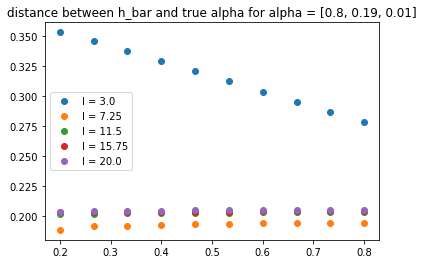

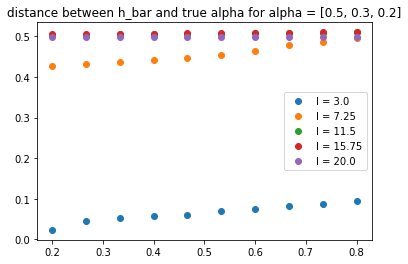

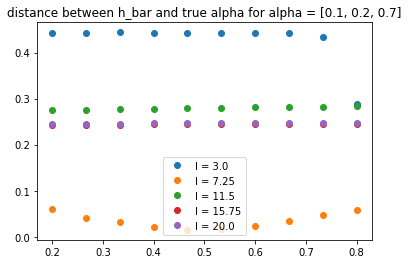

In [12]:
import matplotlib.pyplot as plt
i = 0
for alpha in RES:
    for l_b in alpha:
        l = l_b[0]
        dist = []
        B = []
        for b in l_b[1]:
            B.append(b[0])
            dist.append(min_dist(Alpha[i], b[1]))
        plt.plot(B, dist, "o", label = "l = {l}".format(l=l))
    plt.legend()
    plt.title("distance between h_bar and true alpha for alpha = {}".format(Alpha[i]))
    plt.show()
    i += 1


In [ ]:

for i in range(5):
    for j in range(10):
        dist.append(RES[i][j])

In [13]:
m = 3
n = 40

d = 2

#C_1 = matrix_neighboor(X_1, 320)
#C_2 = matrix_neighboor(X_2, 320)

a = 5
L = 10

Dist_g = np.linspace(3, 7.25, 5)
B = np.linspace(0.2, 0.8, L)
dist = []
C_bar = np.eye(m)
alpha_0 = [0.8, 0.19, 0.01]
alpha_1 = [0.5, 0.3, 0.2]
alpha_2 = [0.1, 0.2, 0.7]
Alpha = [alpha_0, alpha_1, alpha_2]
RES = []
u = 0
for alpha in Alpha:
    mu = [[-10, 10], [1, 2], [10, 3]]#, [40, 50]]
    sigma = [np.array([[3, 1], [1, 10]]), np.array([[1, 1], [0, 2]]), np.array([[3, 0], [0, 1]])]#, np.array([[1, 0], [0, 1]])]
    X = gaussian_mixture(n, d, alpha, mu, sigma)
    l_alpha = []
    for l in Dist_g:
        C = matrix_neighboor(X, l)
        b_alpha = []
        for b in B:
            update_progress(u/150)
            h = [0 for i in range(n)]
            for i in range(n):
                res = 0
                for j in range(n):
                    if C[i][j] != 0:
                        res += 1
                h[i] = np.power(res + a, b)
            h = np.array(h)
            h = 1/np.sum(h)*h
            #h = np.array([np.power(np.sum(C[i]) + a, b) for i in range(n)])
            #h = 1/np.sum(h)*h
            D = np.zeros((n,m))
            T = np.zeros((n,m))
            for i in range(n):
                T[i][0] = h[i]*0.7
                T[i][1] = h[i]*0.3

            solver = CG_solver(T, C, C_bar, h, D)
            T = solver.run(10e-3)
            one = np.array([1 for i in range(n)])
            one_3 = np.array([1 for i in range(m)])
            b_alpha.append([b, T.T@one])
            u += 1
        l_alpha.append([l, b_alpha])
    RES.append(l_alpha)

Percent: [##########] 99.33% 

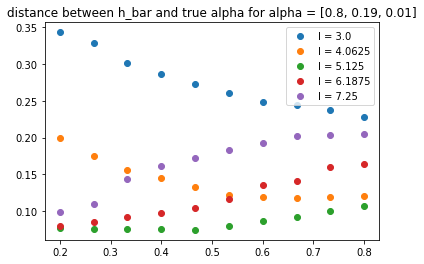

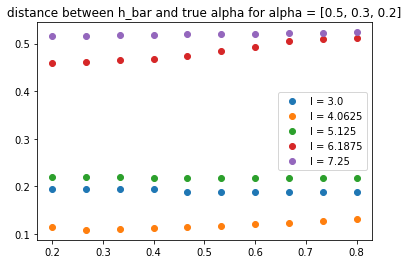

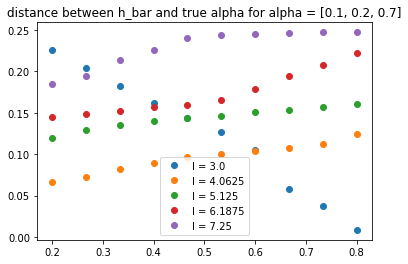

In [14]:
import matplotlib.pyplot as plt
i = 0
for alpha in RES:
    for l_b in alpha:
        l = l_b[0]
        dist = []
        B = []
        for b in l_b[1]:
            B.append(b[0])
            dist.append(min_dist(Alpha[i], b[1]))
        plt.plot(B, dist, "o", label = "l = {l}".format(l=l))
    plt.legend()
    plt.title("distance between h_bar and true alpha for alpha = {}".format(Alpha[i]))
    plt.show()
    i += 1

In [16]:
m = 3
n = 60

d = 2

#C_1 = matrix_neighboor(X_1, 320)
#C_2 = matrix_neighboor(X_2, 320)

a = 5
L = 15

Dist_g = np.linspace(3, 8, 5)
B = np.linspace(0.2, 1, L)
dist = []
C_bar = np.eye(m)
alpha_0 = [0.8, 0.19, 0.01]
alpha_1 = [0.5, 0.3, 0.2]
alpha_2 = [0.1, 0.2, 0.7]
Alpha = [alpha_0, alpha_1, alpha_2]
RES = []
u = 0
for alpha in Alpha:
    mu = [[-10, 10], [1, 2], [10, 3]]#, [40, 50]]
    sigma = [np.array([[3, 1], [1, 10]]), np.array([[1, 1], [0, 2]]), np.array([[3, 0], [0, 1]])]#, np.array([[1, 0], [0, 1]])]
    X = gaussian_mixture(n, d, alpha, mu, sigma)
    l_alpha = []
    for l in Dist_g:
        C = matrix_neighboor(X, l)
        b_alpha = []
        for b in B:
            update_progress(u/150)
            h = [0 for i in range(n)]
            for i in range(n):
                res = 0
                for j in range(n):
                    if C[i][j] != 0:
                        res += 1
                h[i] = np.power(res + a, b)
            h = np.array(h)
            h = 1/np.sum(h)*h
            #h = np.array([np.power(np.sum(C[i]) + a, b) for i in range(n)])
            #h = 1/np.sum(h)*h
            D = np.zeros((n,m))
            T = np.zeros((n,m))
            for i in range(n):
                T[i][0] = h[i]*0.7
                T[i][1] = h[i]*0.3

            solver = CG_solver(T, C, C_bar, h, D)
            T = solver.run(10e-3)
            one = np.array([1 for i in range(n)])
            one_3 = np.array([1 for i in range(m)])
            b_alpha.append([b, T.T@one])
            u += 1
        l_alpha.append([l, b_alpha])
    RES.append(l_alpha)

Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##

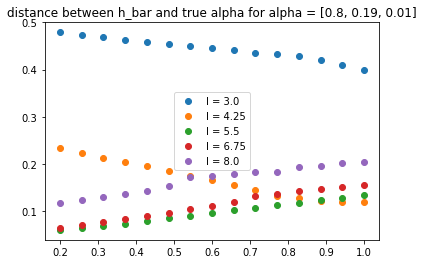

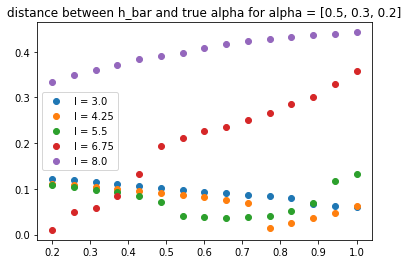

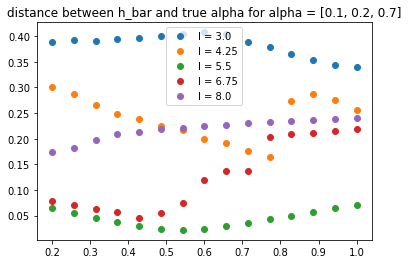

In [18]:
import matplotlib.pyplot as plt
i = 0
for alpha in RES:
    for l_b in alpha:
        l = l_b[0]
        dist = []
        B = []
        for b in l_b[1]:
            B.append(b[0])
            dist.append(min_dist(Alpha[i], b[1]))
        plt.plot(B, dist, "o", label = "l = {l}".format(l=l))
    plt.legend()
    plt.title("distance between h_bar and true alpha for alpha = {}".format(Alpha[i]))
    plt.show()
    i += 1

## Add a non null D

[0.15002182 0.51913442 0.33084376]
[0.14990032 0.51927299 0.33082669]
[0.14972811 0.5196002  0.33067168]
[0.14895187 0.52095904 0.3300891 ]
[0.14783564 0.52256981 0.32959455]
[0.14565777 0.52506942 0.32927281]
[0.14400317 0.52671858 0.32927824]
[0.144235   0.52621107 0.32955392]
[0.31872602 0.31872602 0.36254797]
[0.52621107 0.144235   0.32955392]
[0.52671858 0.14400317 0.32927824]
[0.52506942 0.14565777 0.32927281]
[0.52256981 0.14783564 0.32959455]
[0.52095904 0.14895187 0.3300891 ]
[0.5196002  0.14972811 0.33067168]


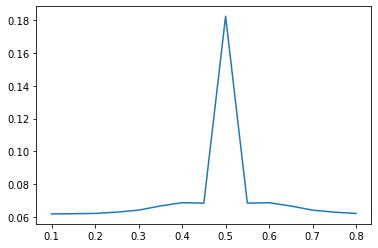

In [32]:
m = 3
n = 100

d = 2

#C_1 = matrix_neighboor(X_1, 320)
#C_2 = matrix_neighboor(X_2, 320)

a = 5
b = 0.77

alpha = [0.5, 0.3, 0.2]

mu = [[-10, 10], [1, 2], [10, 3]]#, [40, 50]]
sigma = [np.array([[3, 1], [1, 10]]), np.array([[1, 1], [0, 2]]), np.array([[3, 0], [0, 1]])]#, np.array([[1, 0], [0, 1]])]
X = gaussian_mixture(n, d, alpha, mu, sigma)

l = 5


C = matrix_neighboor(X, l)

dist = []
dist_plot = []
Beta = np.linspace(0.1, 0.8, 15)
for beta in Beta:
    h = [0 for i in range(n)]
    for i in range(n):
        res = 0
        for j in range(n):
            if C[i][j] != 0:
                res += 1
        h[i] = np.power(res + a, b)
    h = np.array(h)
    h = 1/np.sum(h)*h
    #h = np.array([np.power(np.sum(C[i]) + a, b) for i in range(n)])
    #h = 1/np.sum(h)*h
    D = np.zeros((n,m))
    T = np.zeros((n,m))
    for i in range(n):
        T[i][0] = h[i]*beta
        T[i][1] = h[i]*(1-beta)

    solver = CG_solver(T, C, C_bar, h, D)
    T = solver.run(10e-3)
    one = np.array([1 for i in range(n)])
    one_3 = np.array([1 for i in range(m)])
    dist.append(T.T@one)
    dist_plot.append(min_dist(T.T@one, alpha))
    print(T.T@one)
plt.plot(Beta, dist_plot)

In [35]:
D = np.zeros((n,m))
for i in range(min(n,m)):
    D[i][i] = 1
D

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0

[0.16088416 0.57458507 0.26453077]
[0.1653832  0.56360518 0.27101162]
[0.16947747 0.55518397 0.27533856]
[0.17233151 0.54900332 0.27866518]
[0.17468331 0.544193   0.28112369]


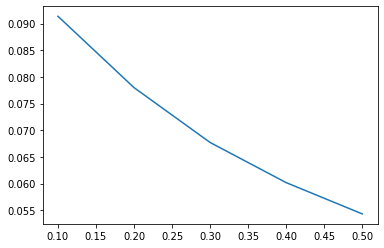

In [39]:
m = 3
n = 100

d = 2

#C_1 = matrix_neighboor(X_1, 320)
#C_2 = matrix_neighboor(X_2, 320)

a = 5
b = 0.77

alpha = [0.5, 0.3, 0.2]

mu = [[-10, 10], [1, 2], [10, 3]]#, [40, 50]]
sigma = [np.array([[3, 1], [1, 10]]), np.array([[1, 1], [0, 2]]), np.array([[3, 0], [0, 1]])]#, np.array([[1, 0], [0, 1]])]
X = gaussian_mixture(n, d, alpha, mu, sigma)

l = 5


C = matrix_neighboor(X, l)

dist = []
dist_plot = []
Beta = np.linspace(0.1, 0.5, 5)
for beta in Beta:
    h = [0 for i in range(n)]
    for i in range(n):
        res = 0
        for j in range(n):
            if C[i][j] != 0:
                res += 1
        h[i] = np.power(res + a, b)
    h = np.array(h)
    h = 1/np.sum(h)*h
    #h = np.array([np.power(np.sum(C[i]) + a, b) for i in range(n)])
    #h = 1/np.sum(h)*h
    D = np.zeros((n,m))
    T = np.zeros((n,m))
    for i in range(min(n,m)):
        D[i][i] = 10
    for i in range(n):
        T[i][0] = h[i]*beta
        T[i][1] = h[i]*(1-beta)

    solver = CG_solver(T, C, C_bar, h, D)
    T = solver.run(10e-3)
    one = np.array([1 for i in range(n)])
    one_3 = np.array([1 for i in range(m)])
    dist.append(T.T@one)
    dist_plot.append(min_dist(T.T@one, alpha))
    print(T.T@one)
plt.plot(Beta, dist_plot)

In [43]:
m = 3
n = 100

d = 2

#C_1 = matrix_neighboor(X_1, 320)
#C_2 = matrix_neighboor(X_2, 320)

a = 5
L = 15

Dist_g = np.linspace(3, 8, 5)
B = np.linspace(0.2, 1, L)
dist = []
C_bar = np.eye(m)
alpha_0 = [0.8, 0.19, 0.01]
alpha_1 = [0.5, 0.3, 0.2]
alpha_2 = [0.1, 0.2, 0.7]
Alpha = [alpha_0, alpha_1, alpha_2]
RES = []
u = 0
for alpha in Alpha:
    mu = [[-10, 10], [1, 2], [10, 3]]#, [40, 50]]
    sigma = [np.array([[3, 1], [1, 10]]), np.array([[1, 1], [0, 2]]), np.array([[3, 0], [0, 1]])]#, np.array([[1, 0], [0, 1]])]
    X = gaussian_mixture(n, d, alpha, mu, sigma)
    l_alpha = []
    for l in Dist_g:
        C = matrix_neighboor(X, l)
        b_alpha = []
        for b in B:
            update_progress(u/150)
            h = [0 for i in range(n)]
            for i in range(n):
                res = 0
                for j in range(n):
                    if C[i][j] != 0:
                        res += 1
                h[i] = np.power(res + a, b)
            h = np.array(h)
            h = 1/np.sum(h)*h
            #h = np.array([np.power(np.sum(C[i]) + a, b) for i in range(n)])
            #h = 1/np.sum(h)*h
            D = 10*np.zeros((n,m))
            for i in range(min(n,m)):
                D[i][i] = 10
            T = np.zeros((n,m))
            for i in range(n):
                T[i][0] = h[i]*0.7
                T[i][1] = h[i]*0.3

            solver = CG_solver(T, C, C_bar, h, D)
            T = solver.run(10e-3)
            one = np.array([1 for i in range(n)])
            one_3 = np.array([1 for i in range(m)])
            b_alpha.append([b, T.T@one])
            u += 1
        l_alpha.append([l, b_alpha])
    RES.append(l_alpha)

Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##########] 100.00% Done...
Percent: [##

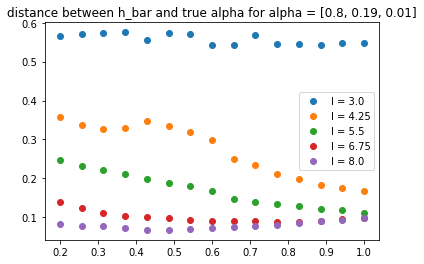

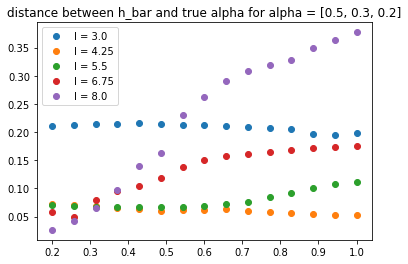

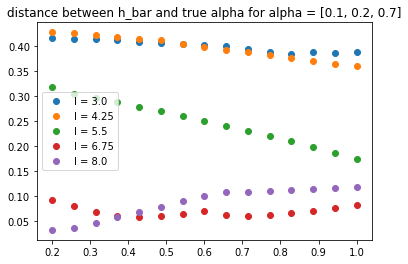

In [44]:
import matplotlib.pyplot as plt
i = 0
for alpha in RES:
    for l_b in alpha:
        l = l_b[0]
        dist = []
        B = []
        for b in l_b[1]:
            B.append(b[0])
            dist.append(min_dist(Alpha[i], b[1]))
        plt.plot(B, dist, "o", label = "l = {l}".format(l=l))
    plt.legend()
    plt.title("distance between h_bar and true alpha for alpha = {}".format(Alpha[i]))
    plt.show()
    i += 1